In [1]:
!pip install praat-parselmouth

    100% |████████████████████████████████| 8.1MB 3.1MB/s eta 0:00:01
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import parselmouth as pm
import os
import numpy as np
import matplotlib.pyplot as plt

Praat is a software package written in C and C++ that implements many speech analysis algorithms in an easy-to-use interface. We're going to be using the parselmouth package, a Python wrapper for Praat functions. Documentation is sparse for the library, but exploring the [documentation](https://parselmouth.readthedocs.io/en/stable/installation.html) might be helpful to find new functions. 

In [4]:
Harris = pm.Sound("Harris.wav")
type(Harris)

parselmouth.Sound

We've imported Harris's voice as a parselmouth.Sound object. This is parselmouth's version of his voice, and has a huge number of features that can be found on the [documentation](https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.Sound). The only problem with the documentation is that it doesn't exist. This library is abysmally documented. But that's ok, I can show you how to get what you need from it. 

In [7]:
hInt = Harris.to_intensity()
hPit = Harris.to_pitch()
hForm = Harris.to_formant_burg()

In [20]:
hInt

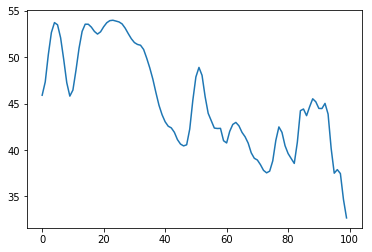

In [36]:
intensities = []
for val in hInt.t_grid():
    intensities.append(hInt.get_value(val))
plt.plot(intensities[:100])

The .t_grid() attribute shows a list of timesteps within the sound file. By iterating over this list of times, we can pull every value from the Sound object and add it to a new list, like we're doing below. This can be done for any of the features. 

In [32]:
formants = [[],[],[]]
for val in hForm.t_grid():
    formants[0].append(hForm.get_value_at_time(1,val))
    formants[1].append(hForm.get_value_at_time(2,val))
    formants[2].append(hForm.get_value_at_time(3,val))
    

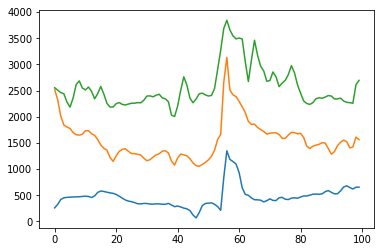

In [33]:
plt.plot(formants[0][0:100])
plt.plot(formants[1][0:100])
plt.plot(formants[2][0:100])